In [1]:
%matplotlib inline
import pandas as pd
import os.path as path
import urllib2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# Set some Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Store data in a consistent place
DATA_FILE = '../../data/2008.csv.bz2'
URL = 'http://stat-computing.org/dataexpo/2009/2008.csv.bz2'

def download_if_needed(filename, url):
    if path.isfile(filename) is False:
        req = urllib2.urlopen(url)
        CHUNK_SIZE = 16 * 1024
        with open(filename, 'wb') as fp:
            while True:
                chunk = req.read(CHUNK_SIZE)
                if not chunk: break
                fp.write(chunk)

/home/io/.tools/anaconda/envs/ds/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
download_if_needed(DATA_FILE, URL)
df_flights = pd.read_csv(DATA_FILE, nrows = 100000, compression='bz2')
df_flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926,930,1054,1100,WN,1746,N612SW,88,90,78,-6,-4,IND,BWI,515,3,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,NaN,0,2,0,0,0,32
5,2008,1,3,4,1940,1915,2121,2110,WN,378,N726SW,101,115,87,11,25,IND,JAX,688,4,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937,1830,2037,1940,WN,509,N763SW,240,250,230,57,67,IND,LAS,1591,3,7,0,NaN,0,10,0,0,0,47
7,2008,1,3,4,1039,1040,1132,1150,WN,535,N428WN,233,250,219,-18,-1,IND,LAS,1591,7,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617,615,652,650,WN,11,N689SW,95,95,70,2,2,IND,MCI,451,6,19,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620,1620,1639,1655,WN,810,N648SW,79,95,70,-16,0,IND,MCI,451,3,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,100000,100000,100000.000000,100000.000000,98858.000000,100000.000000,98698.000000,100000.000000,100000.000000,98698.000000,100000.000000,98698.000000,98698.000000,98858.000000,100000.000000,98698.000000,98858.000000,100000.000000,100000.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000
mean,2008,1,17.087860,3.890040,1355.200722,1341.989400,1492.739225,1502.601540,1510.648540,107.558502,111.989540,91.863797,5.729954,10.379049,630.586320,4.768962,10.927765,0.011420,0.001600,9.573488,2.036120,8.353151,0.110805,29.343675
std,0,0,8.356364,1.952999,464.089632,451.356984,496.376794,478.100216,1186.128598,55.350971,57.209135,54.208224,30.966959,28.384428,437.357075,2.983635,5.989580,0.106253,0.039968,21.836836,13.815868,18.826087,1.724888,39.753529
min,2008,1,1.000000,1.000000,1.000000,600.000000,1.000000,5.000000,1.000000,25.000000,17.000000,12.000000,-57.000000,-44.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,1,10.000000,2.000000,942.000000,940.000000,1114.000000,1120.000000,502.000000,68.000000,70.000000,53.000000,-9.000000,-2.000000,324.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2008,1,17.000000,4.000000,1344.000000,1335.000000,1518.000000,1520.000000,1320.000000,88.000000,90.000000,71.000000,-2.000000,1.000000,453.000000,4.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000
75%,2008,1,24.000000,5.000000,1743.000000,1730.000000,1913.000000,1910.000000,2362.000000,135.000000,145.000000,119.000000,10.000000,10.000000,843.000000,5.000000,12.000000,0.000000,0.000000,11.000000,0.000000,10.000000,0.000000,37.000000
max,2008,1,31.000000,7.000000,2359.000000,2235.000000,2400.000000,2355.000000,7676.000000,382.000000,370.000000,369.000000,500.000000,516.000000,2363.000000,213.000000,150.000000,1.000000,1.000000,431.000000,267.000000,366.000000,88.000000,434.000000


In [4]:
def add_dummies(ds, dummy_cols, exp_cols):
    dummies = {}
    for col_name in dummy_cols:
        dummies = pd.get_dummies(ds[col_name], prefix = col_name)
        dummies = dummies.drop(dummies.columns[0], axis=1)
        ds = ds.join(dummies)
        exp_cols.extend(dummies.columns.tolist())
    return exp_cols, ds

In [5]:
df_flights = df_flights[(df_flights['Cancelled']==0) & (df_flights['Diverted']==0)].dropna(how='all')
df_flights['Delayed'] = df_flights.ArrDelay > 0
df_flights['DepHour'] = df_flights['CRSDepTime'].apply(lambda t: int(t / 100))

dummy_cols = ['Month', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'DepHour']
exp_cols = ['Distance']
exp_cols, df_flights = add_dummies(df_flights, dummy_cols, exp_cols)
print exp_cols

['Distance', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'UniqueCarrier_XE', 'Origin_ALB', 'Origin_AMA', 'Origin_AUS', 'Origin_BDL', 'Origin_BFL', 'Origin_BHM', 'Origin_BNA', 'Origin_BOI', 'Origin_BTR', 'Origin_BUF', 'Origin_BUR', 'Origin_BWI', 'Origin_CHS', 'Origin_CLE', 'Origin_CLT', 'Origin_CMH', 'Origin_COS', 'Origin_CRP', 'Origin_CRW', 'Origin_DAL', 'Origin_DAY', 'Origin_DEN', 'Origin_DTW', 'Origin_ELP', 'Origin_EWR', 'Origin_FAT', 'Origin_FLL', 'Origin_GEG', 'Origin_HOU', 'Origin_HRL', 'Origin_IAD', 'Origin_IAH', 'Origin_IND', 'Origin_ISP', 'Origin_JAN', 'Origin_JAX', 'Origin_LAS', 'Origin_LAX', 'Origin_LBB', 'Origin_LCH', 'Origin_LFT', 'Origin_LGB', 'Origin_LIT', 'Origin_MAF', 'Origin_MCI', 'Origin_MCO', 'Origin_MDW', 'Origin_MHT', 'Origin_MKE', 'Origin_MRY', 'Origin_MSY', 'Origin_OAK', 'Origin_OKC', 'Origin_OMA', 'Origin_ONT', 'Origin_ORD', 'Origin_ORF', 'Origin_PBI', 'Origin_PDX', 'Origin_PHL', 'Origin_PHX', 'Origin_PIT', 'Origin_P

/home/io/.tools/anaconda/envs/ds/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


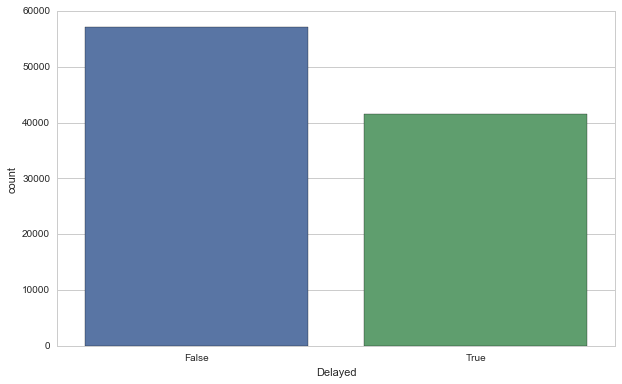

In [6]:
sns.set_style("whitegrid")
sns.countplot(x="Delayed", data=df_flights)

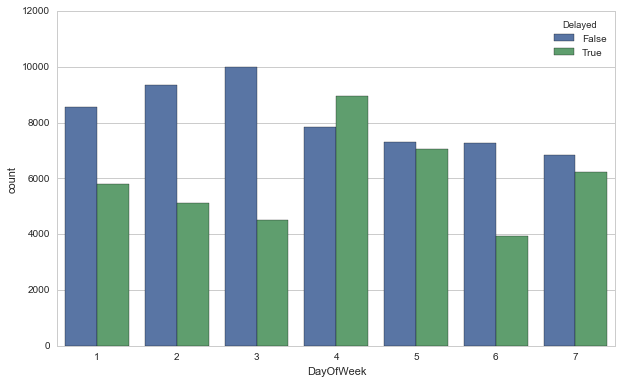

In [7]:
sns.countplot(x="DayOfWeek", hue="Delayed", data=df_flights, order = range(1, 8))

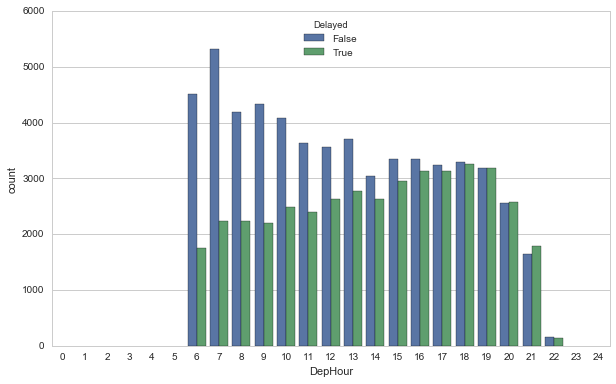

In [8]:
sns.countplot(x="DepHour", hue="Delayed", data=df_flights, order = range(0, 25))

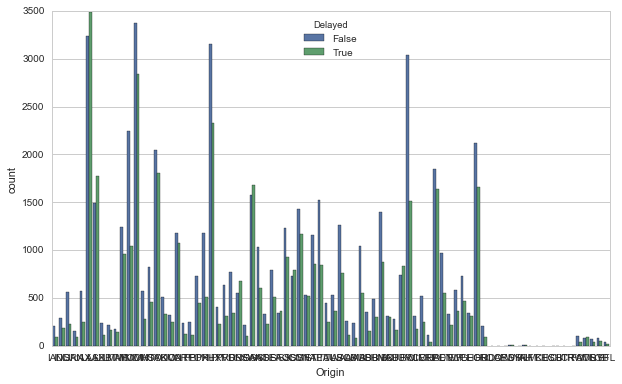

In [9]:
sns.countplot(x="Origin", hue="Delayed", data=df_flights)

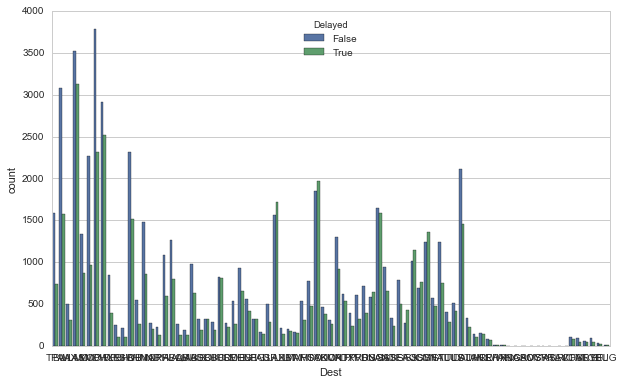

In [10]:
sns.countplot(x="Dest", hue="Delayed", data=df_flights)

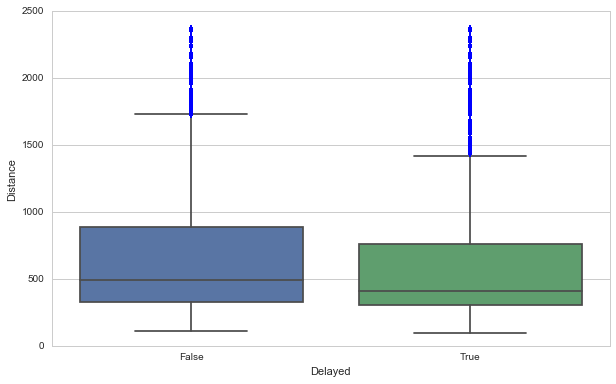

In [11]:
sns.boxplot(x="Delayed", y="Distance", data=df_flights)

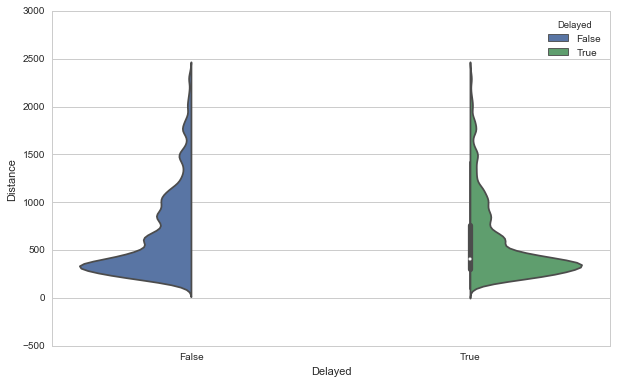

In [12]:
sns.violinplot(x = "Delayed", y="Distance", hue="Delayed", data=df_flights, 
               split=True, scale="count")

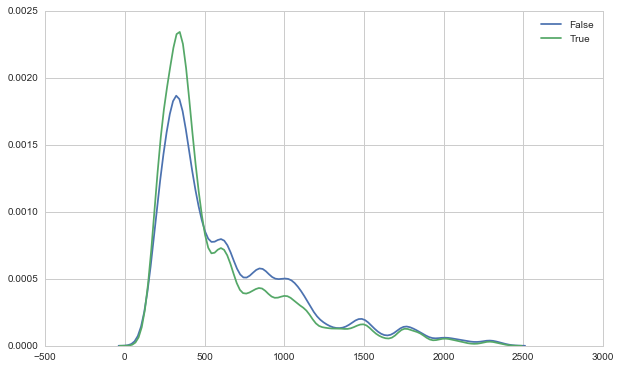

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(df_flights[-df_flights.Delayed].Distance, label="False", ax=ax)
sns.kdeplot(df_flights[df_flights.Delayed].Distance, label="True", ax=ax)

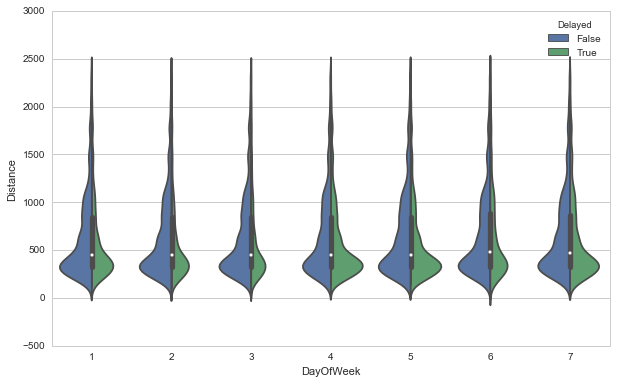

In [14]:
sns.violinplot(x="DayOfWeek", y="Distance", hue="Delayed", data=df_flights, 
               split=True, scale="count", order=range(1,8))

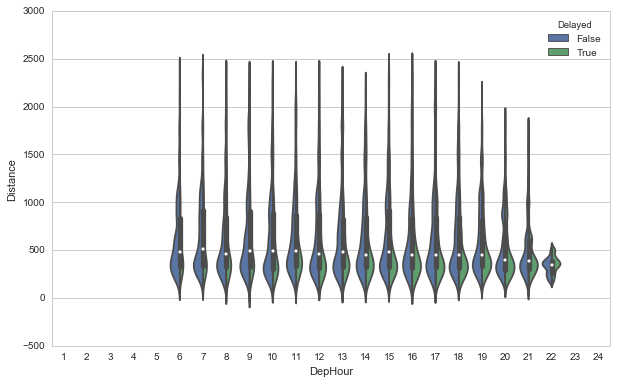

In [15]:
sns.violinplot(x="DepHour", y="Distance", hue="Delayed", data=df_flights, 
               split=True, scale="count", order=range(1,25))

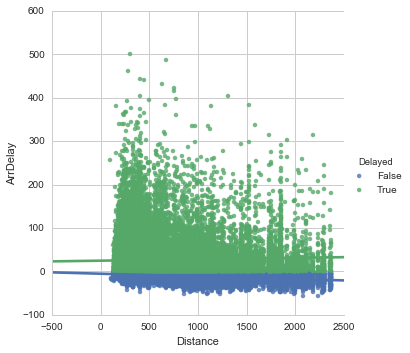

In [16]:
sns.lmplot(x="Distance", y="ArrDelay", hue="Delayed", data=df_flights)

In [17]:
no_rows = df_flights['Delayed'].count()
half_rows = int(no_rows / 2)
flights_X = df_flights[exp_cols]
flights_y = df_flights['Delayed']
flights_X_train = flights_X.loc[0: half_rows - 1]
flights_y_train = flights_y.loc[0: half_rows - 1]
flights_X_test = flights_X.loc[half_rows: no_rows - 1]
flights_y_test = flights_y.loc[half_rows: no_rows - 1]

In [18]:
from sklearn import linear_model

logm = linear_model.LogisticRegression()
logm.fit(flights_X_train.values, flights_y_train.values)
logm.score(flights_X_test.values, flights_y_test.values)

0.60330188679245278